In [1]:
'''Task 1(Import Fish Dataset)'''
import pandas as pd
import pickle
dataset=pd.read_csv("Fish.csv")
dataset

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [2]:
print(dataset.shape)

(159, 7)


In [3]:
'''Task 2(Exploratory Analysis of CSV Data)'''
dataset.isnull().sum() #Shows whether there are any null values 

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<AxesSubplot:>

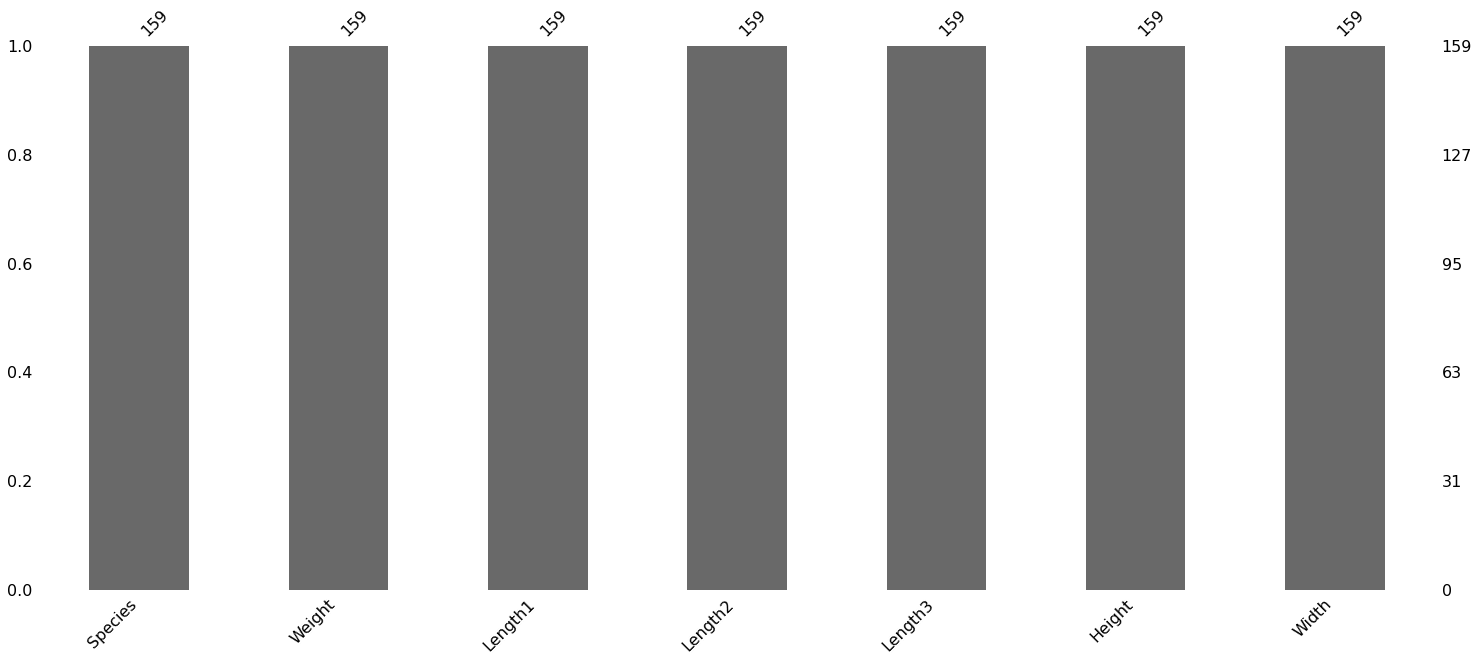

In [4]:
import missingno as msno
msno.bar(dataset)         #Displays missing values

So there are no missing values in the above dataset

In [5]:
'''Task 3 Selecting Features for training algorithms'''
y = dataset["Species"]        #Species is output. Therefore used as y variable
X = dataset.drop(["Species"],axis = 1)   #Remaining columns are input 
X.head(10)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
5,450.0,26.8,29.7,34.7,13.6024,4.9274
6,500.0,26.8,29.7,34.5,14.1795,5.2785
7,390.0,27.6,30.0,35.0,12.6700,4.6900
8,450.0,27.6,30.0,35.1,14.0049,4.8438
9,500.0,28.5,30.7,36.2,14.2266,4.9594


In [21]:
'''Task 4 This task is used to check the accuracy of algorithm'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #80% Training & 20% Testing

In [23]:
#Decision Tree
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)           #Fit the model

DecisionTreeClassifier()

In [24]:
DT.score(X_train,y_train)

1.0

In [25]:
yPredDT = DT.predict(X_test)
print(accuracy_score(y_test, yPredDT))

0.6875


In [26]:
#save the model 
filename = "fish_model.pkl"
pickle.dump(DT, open(filename,"wb"))